## Assignment-3: Poverty Rates and Health outcomes Analysis.

<h3>Introduction</h3>
- The purpose of this Assignment 3 is to learn how to pool or link/integrating data from multiple sources to answer questions about two-variable questions.

#### Central Question:Are health outcomes correlated with poverty levels in a community?



..

In [1]:
pip install census us


Note: you may need to restart the kernel to use updated packages.


## Setup

In [2]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from census import Census
import us 

## Data

<p>The data came from diverse places-US census data,Center for Disease prevention,FIPS codes,Centre for Disease Control(CDC). <a href="http://ghdx.healthdata.org/record/ihme-data/united-states-infectious-disease-mortality-rates-county-1980-2014">Infectious Diseases dataset</a> and other places <a href= "https://www.cdc.gov/nchs/pressroom/sosmap/infant_mortality_rates/infant_mortality.htm">Infant Mortality data</a> The Data has a lot of mixups and needs a careful cleaning</p>


 **I first did the data cleaning, pooling and linkings before answering the questions**

In [3]:
c = Census('0cf522497673aca700a808adcb1865a4e6a4283e')
#Retrieving the census data using the key and displaying some variables in the dataset

In [4]:
cen_state= pd.DataFrame.from_records(c.acs5.state(('NAME', 'B05010_001E', 'B05010_002E'), '*', year=2014)).rename(columns={'state':'FIPS','B05010_001E':'Est_TotalNo','B05010_002E':'Fam_UnderP'})
cen_state.head()


,NAME,Est_TotalNo,Fam_UnderP,FIPS
0,Alabama,1048560.0,281052.0,01
1,Alaska,179242.0,23963.0,02
2,Arizona,1532525.0,385737.0,04
3,Arkansas,663036.0,179070.0,05
4,California,8778017.0,1945049.0,06


Describing the Census Data Numerically:

In [5]:
cen_state.describe()

,Est_TotalNo,Fam_UnderP
count,5.200000e+01,5.200000e+01
mean,1.365722e+06,2.958818e+05
std,1.591197e+06,3.684285e+05
min,1.003340e+05,1.760000e+04
25%,3.982012e+05,7.701250e+04
50%,9.149400e+05,1.963940e+05
75%,1.521936e+06,3.309128e+05
max,8.778017e+06,1.945049e+06


..

<b>Calculating the poverty ratio across the states and converting the FIPS code to flaot to enable me use it 
later to merge with other data sets for easy comparison.</b>

In [6]:
cen_state['pov_ratio']=cen_state['Fam_UnderP']/cen_state['Est_TotalNo']
cen_state["FIPS"] = cen_state["FIPS"].astype("float")
cen_state.head()

,NAME,Est_TotalNo,Fam_UnderP,FIPS,pov_ratio
0,Alabama,1048560.0,281052.0,1.0,0.268036
1,Alaska,179242.0,23963.0,2.0,0.133691
2,Arizona,1532525.0,385737.0,4.0,0.251700
3,Arkansas,663036.0,179070.0,5.0,0.270076
4,California,8778017.0,1945049.0,6.0,0.221582


**Loading the Infectious Diseases Data; removing the unwanted parts of the data from Global Health Data Exchange and cleaning the data of unwanted parts**

In [7]:
sheet=pd.read_excel('IHME_USA_COUNTY_INFECT_DIS_MORT_1980_2014_NATIONAL_Y2018M03D27.XLSX',sheet_name=None,header=1,skipfooter=2)
sheet

{'Tuberculosis':                         Location     FIPS Mortality Rate, 1980*  \
 0                  United States      NaN     1.52 (1.44, 1.61)   
 1                        Alabama      1.0     1.46 (1.33, 1.59)   
 2        Autauga County, Alabama   1001.0     0.95 (0.68, 1.29)   
 3        Baldwin County, Alabama   1003.0     0.84 (0.63, 1.12)   
 4        Barbour County, Alabama   1005.0     1.11 (0.82, 1.48)   
 ...                          ...      ...                   ...   
 3189  Sweetwater County, Wyoming  56037.0     0.61 (0.42, 0.89)   
 3190       Teton County, Wyoming  56039.0     0.46 (0.31, 0.66)   
 3191       Uinta County, Wyoming  56041.0     0.62 (0.39, 0.94)   
 3192    Washakie County, Wyoming  56043.0     0.55 (0.36, 0.83)   
 3193      Weston County, Wyoming  56045.0     0.54 (0.36, 0.81)   
 
      Mortality Rate, 1985* Mortality Rate, 1990* Mortality Rate, 1995*  \
 0        1.26 (1.20, 1.31)     1.03 (0.98, 1.07)     0.78 (0.75, 0.81)   
 1        1.41 (

In [8]:
typeof_disease=['Tuberculosis','HIV AIDS','Diahrrheal diseases','Lower respiratory infections','Meningitis','Hepatitis']
var_disease=['Mortality Rate,1980*','Mortality Rate,1985*','Mortality Rate,1990*','Mortality Rate,1995*','Mortality Rate,2000*','Mortality Rate,2005*','Mortality Rate,2010*','Mortality Rate,2014*',
            '% Change in Mortality Rate, 1980-2014','% change in Mortality Rate,1985-2014']

for disease in sheet:
    for var in sheet[disease].columns:
        if (var not in ["Location", "FIPS"]):
            sheet[disease][var]=sheet[disease][var].str.replace(r'\s*\(.+\)','').astype('f8')
sheet

{'Tuberculosis':                         Location     FIPS  Mortality Rate, 1980*  \
 0                  United States      NaN                   1.52   
 1                        Alabama      1.0                   1.46   
 2        Autauga County, Alabama   1001.0                   0.95   
 3        Baldwin County, Alabama   1003.0                   0.84   
 4        Barbour County, Alabama   1005.0                   1.11   
 ...                          ...      ...                    ...   
 3189  Sweetwater County, Wyoming  56037.0                   0.61   
 3190       Teton County, Wyoming  56039.0                   0.46   
 3191       Uinta County, Wyoming  56041.0                   0.62   
 3192    Washakie County, Wyoming  56043.0                   0.55   
 3193      Weston County, Wyoming  56045.0                   0.54   
 
       Mortality Rate, 1985*  Mortality Rate, 1990*  Mortality Rate, 1995*  \
 0                      1.26                   1.03                   0.78  

In [9]:
#Extracting  Diarheal and Meningitis data from the GHDX data:

Diarrheal=sheet['Diarrheal diseases']

meningitis=sheet['Meningitis']



**Data Extraction and Merging**

To answer questions on this Analysis, we need to merge relevant portions of different datasets:first, Having Extracted Mortality rate for Meningitis and Diarrheal disease records in 2014, we need to extract FIPS less than to obtain the state level data.

In [10]:
#Extracting FIPS less than 100 and filtring the columns i need from the infectious diseases data for Diarrheal
Dfips_less100= Diarrheal.loc[Diarrheal['FIPS']<100] 
Dfips_less100=Dfips_less100.filter(['Location','FIPS','Mortality Rate, 2014*'])
Dfips_less100.head()

,Location,FIPS,"Mortality Rate, 2014*"
1,Alabama,1.0,2.41
69,Alaska,2.0,1.34
99,Arizona,4.0,2.55
115,Arkansas,5.0,2.02
191,California,6.0,2.21


In [11]:
# Extracting data where FIPS code is less than 100 and filtering out the data that are not needed 
Mfips_less100= meningitis.loc[meningitis['FIPS']<100]
Mfips_less100=Mfips_less100.filter(['Location','FIPS','Mortality Rate, 2014*'])
Mfips_less100.head()

,Location,FIPS,"Mortality Rate, 2014*"
1,Alabama,1.0,0.58
69,Alaska,2.0,0.43
99,Arizona,4.0,0.43
115,Arkansas,5.0,0.52
191,California,6.0,0.31


<b>Combining Census data with infectious diseases Diarrheal  data:</b>

In [12]:
#Merging the census data with the Diarrheal data extracted.
cen_and_Dia=cen_state.merge(Dfips_less100,on='FIPS')
cen_and_Dia.head()

,NAME,Est_TotalNo,Fam_UnderP,FIPS,pov_ratio,Location,"Mortality Rate, 2014*"
0,Alabama,1048560.0,281052.0,1.0,0.268036,Alabama,2.41
1,Alaska,179242.0,23963.0,2.0,0.133691,Alaska,1.34
2,Arizona,1532525.0,385737.0,4.0,0.251700,Arizona,2.55
3,Arkansas,663036.0,179070.0,5.0,0.270076,Arkansas,2.02
4,California,8778017.0,1945049.0,6.0,0.221582,California,2.21


**Combining Census data with (Meningitis and DIarrheal) extracted data by their FIPS Code**

In [13]:
#Merging census data with the Meningitis etracted record
cen_and_men=cen_state.merge(Mfips_less100,on='FIPS')
cen_and_men.head()

,NAME,Est_TotalNo,Fam_UnderP,FIPS,pov_ratio,Location,"Mortality Rate, 2014*"
0,Alabama,1048560.0,281052.0,1.0,0.268036,Alabama,0.58
1,Alaska,179242.0,23963.0,2.0,0.133691,Alaska,0.43
2,Arizona,1532525.0,385737.0,4.0,0.251700,Arizona,0.43
3,Arkansas,663036.0,179070.0,5.0,0.270076,Arkansas,0.52
4,California,8778017.0,1945049.0,6.0,0.221582,California,0.31


**Loading Infant Mortality Data**

In [14]:
#Loading the infant mortality dataset and filtering out the columns i dont need to answer questions about this data
infant_mort=pd.read_csv('undefined.csv')
infant_mort=infant_mort.filter(['YEAR','STATE','RATE','DEATHS'])
infant_mort

,YEAR,STATE,RATE,DEATHS
0,2019,AL,7.89,449
1,2019,AK,4.81,48
2,2019,AZ,5.24,429
3,2019,AR,6.9,251
4,2019,CA,4.06,1879
...,...,...,...,...
345,2005,VA,7.47,781
346,2005,WA,5.07,419
347,2005,WV,8.16,170
348,2005,WI,6.54,464


In [15]:
#Retrieving the keys and values
key=list(us.states.mapping('fips','abbr').keys())
value=list(us.states.mapping('fips','abbr').values())


In [16]:
#Changing the name to something meaningful
fip_state=pd.DataFrame({'FIPS':key,'STATE':value},columns=['FIPS','STATE'])
fip_state.head()


,FIPS,STATE
0,01,AL
1,02,AK
2,04,AZ
3,05,AR
4,06,CA


In [17]:
#Merging infant mortality data with FIP state data and converting the FIPS column to float.
i_and_fip=infant_mort.merge(fip_state,on='STATE',right_index=False)
i_and_fip['FIPS']=i_and_fip['FIPS'].astype(float)
i_and_fip

,YEAR,STATE,RATE,DEATHS,FIPS
0,2019,AL,7.89,449,1.0
1,2018,AL,6.94,401,1.0
2,2017,AL,7.38,435,1.0
3,2016,AL,9.03,534,1.0
4,2015,AL,8.31,496,1.0
...,...,...,...,...,...
345,2017,WY,4.64,32,56.0
346,2016,WY,5.01,37,56.0
347,2015,WY,4.89,38,56.0
348,2014,WY,6.37,49,56.0


**Extracting infant Mortality rate in 2014:**

In [18]:
# filtring out the mortality rate of 2014
by_year=i_and_fip.loc[i_and_fip['YEAR']== 2014]
by_year.head()

,YEAR,STATE,RATE,DEATHS,FIPS
5,2014,AL,8.67,515,1.0
12,2014,AK,6.67,76,2.0
19,2014,AZ,6.1,530,4.0
26,2014,AR,7.48,288,5.0
33,2014,CA,4.32,2173,6.0


**Merging the Census-Meningitis and Census-Diarrheal mortality rates data with the mortality rate-2014 data respt:**

In [19]:
#Merging the Census-Meningitis merged data with the mortality rate-2014 data
new2014_CenMen=cen_and_men.merge(by_year,on='FIPS')
new2014_CenMen.head()

,NAME,Est_TotalNo,Fam_UnderP,FIPS,pov_ratio,Location,"Mortality Rate, 2014*",YEAR,STATE,RATE,DEATHS
0,Alabama,1048560.0,281052.0,1.0,0.268036,Alabama,0.58,2014,AL,8.67,515
1,Alaska,179242.0,23963.0,2.0,0.133691,Alaska,0.43,2014,AK,6.67,76
2,Arizona,1532525.0,385737.0,4.0,0.251700,Arizona,0.43,2014,AZ,6.1,530
3,Arkansas,663036.0,179070.0,5.0,0.270076,Arkansas,0.52,2014,AR,7.48,288
4,California,8778017.0,1945049.0,6.0,0.221582,California,0.31,2014,CA,4.32,2173


In [20]:

new2014_CenDia=cen_and_Dia.merge(by_year,on='FIPS')
new2014_CenDia.head()

,NAME,Est_TotalNo,Fam_UnderP,FIPS,pov_ratio,Location,"Mortality Rate, 2014*",YEAR,STATE,RATE,DEATHS
0,Alabama,1048560.0,281052.0,1.0,0.268036,Alabama,2.41,2014,AL,8.67,515
1,Alaska,179242.0,23963.0,2.0,0.133691,Alaska,1.34,2014,AK,6.67,76
2,Arizona,1532525.0,385737.0,4.0,0.251700,Arizona,2.55,2014,AZ,6.1,530
3,Arkansas,663036.0,179070.0,5.0,0.270076,Arkansas,2.02,2014,AR,7.48,288
4,California,8778017.0,1945049.0,6.0,0.221582,California,2.21,2014,CA,4.32,2173


### Question1: Describing the state poverty ratio:Numerically and graphically:

In [21]:
NumDesc=new2014_CenDia['pov_ratio'].describe()
NumDesc

count    50.000000
mean      0.199019
std       0.049121
min       0.110946
25%       0.150691
50%       0.192163
75%       0.240783
max       0.313809
Name: pov_ratio, dtype: float64

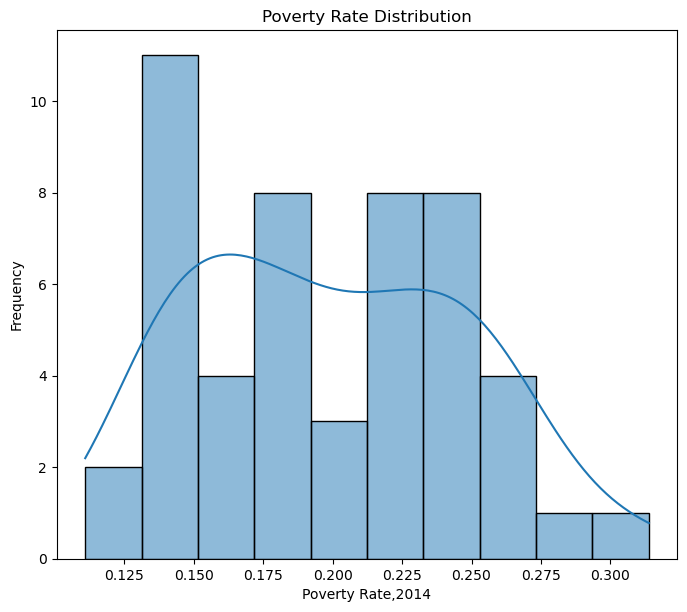

In [22]:
plt.figure(figsize=(8,7),dpi=100)
sns.histplot(new2014_CenDia['pov_ratio'],kde=True,bins=10)
plt.title('Poverty Rate Distribution')
plt.ylabel('Frequency',fontsize=10)
plt.xlabel('Poverty Rate,2014',fontsize=10)
plt.show()

This distribution is slightly right skewed.

### Question2:The relationship of poverty rates to mortality rates of two different disease families: Diarrheal and Meningitis mortality rates

Poverty rate and the two disease groups-Meningitis and Diarheal

In [23]:
Rshp = pd.DataFrame(np.array([new2014_CenDia['pov_ratio'], new2014_CenDia['Mortality Rate, 2014*'],new2014_CenMen['Mortality Rate, 2014*']]).T, 
                   columns = ["Poverty_Ratio", "Mortality_Rate_2014_Diar","Mortality_Rate_2014_Men"])
Rshp.head()

,Poverty_Ratio,Mortality_Rate_2014_Diar,Mortality_Rate_2014_Men
0,0.268036,2.41,0.58
1,0.133691,1.34,0.43
2,0.251700,2.55,0.43
3,0.270076,2.02,0.52
4,0.221582,2.21,0.31


### the relationship of poverty rates to mortality rates of  — Meningitis and Diarrheal deseases — using pairplots 

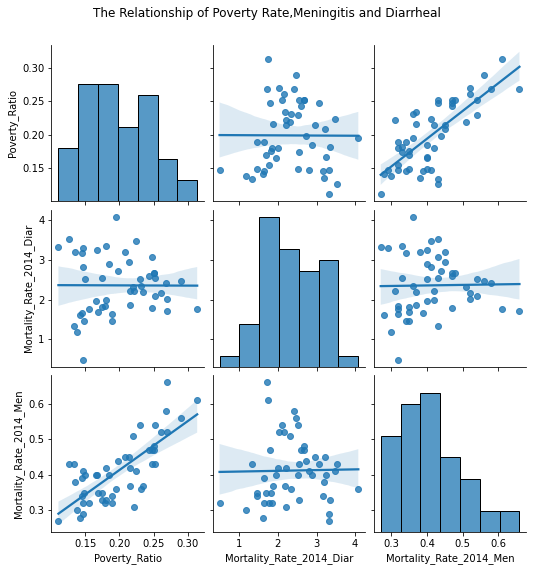

In [24]:
sns.pairplot(Rshp,kind='reg')
plt.suptitle('The Relationship of Poverty Rate,Meningitis and Diarrheal',y=1.05)
plt.show()

### Question3:Bootstrapped Confidence Intervals of Correlation Coefficients

Correlation Coef. of Poverty rate and Mortality rate of Diarrhea

In [25]:
por_Diar_criti=Rshp['Poverty_Ratio'].corr( Rshp['Mortality_Rate_2014_Diar'])
por_Diar_criti

-0.004185180123510468

Here, this implies that poverty rate there is no correlation between poverty rate and Mortality rate(Diahrrhea) as shown by the value which is very far from 1.

In [26]:
por_Men_criti=Rshp['Poverty_Ratio'].corr(Rshp['Mortality_Rate_2014_Men'])
por_Men_criti

0.7550283665242883

Here, this implies that poverty rate is positively correlated with Mortality rate(Meningitis) as shown by the value which is close to 1.

In [27]:
NBOOT = 10000
boot_corrs = np.empty(NBOOT)
for i in range(NBOOT):
    samp = Rshp.sample(n=len(Rshp), replace=True)
    boot_corrs[i] = samp['Poverty_Ratio'].corr(samp['Mortality_Rate_2014_Diar'])
np.quantile(boot_corrs, [0.025, 0.975])

array([-0.27922945,  0.28020998])

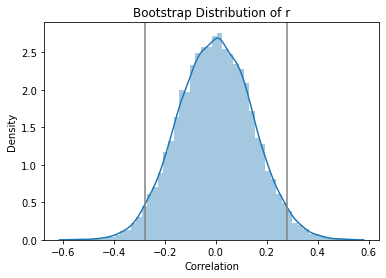

In [28]:
sns.distplot(boot_corrs)
lb, ub = np.quantile(boot_corrs, [0.025, 0.975])
plt.axvline(lb, color='grey')
plt.axvline(ub, color='grey')
plt.title('Bootstrap Distribution of r')
plt.ylabel('Density')
plt.xlabel('Correlation')
plt.show()

This Bootstrapped CI shows that the correlation coefficient lies between the interval of -0.29400339 and 0.28076391, and as such confirms the corrlation coefficient.I suspect it is normal.

In [29]:
NBOOT = 10000
boot_corrs1 = np.empty(NBOOT)
for i in range(NBOOT):
    samp = Rshp.sample(n=len(Rshp), replace=True)
    boot_corrs1[i] = samp['Poverty_Ratio'].corr(samp['Mortality_Rate_2014_Men'])
np.quantile(boot_corrs1, [0.025, 0.975])

array([0.60935096, 0.85654905])

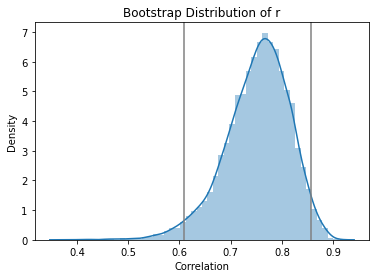

In [30]:
sns.distplot(boot_corrs1)
lb, ub = np.quantile(boot_corrs1, [0.025, 0.975])
plt.axvline(lb, color='grey')
plt.axvline(ub, color='grey')
plt.title('Bootstrap Distribution of r')
plt.ylabel('Density')
plt.xlabel('Correlation')
plt.show()

This Bootstrapped CI shows that the correlation coefficient lies between the interval of 0.60733948 and 0.85675901, and as such confirms the corrlation coefficient ealier computed. The Bootstrap confidence is left skewed.

### Question4: Repeating (2) and (3) for infant mortality:

In [31]:

Rshp1 = pd.DataFrame([new2014_CenDia['RATE'].astype('float'),new2014_CenDia['pov_ratio']]).T
Rshp1=Rshp1.rename(columns={"RATE":"Infant_MortalityRate","pov_ratio":"Poverty_Rate"})
Rshp1.head()

,Infant_MortalityRate,Poverty_Rate
0,8.67,0.268036
1,6.67,0.133691
2,6.10,0.251700
3,7.48,0.270076
4,4.32,0.221582


In [32]:
Rshp1['Poverty_Rate'].corr( Rshp1['Infant_MortalityRate'])
                                           

0.6154666056611091


There is a positive correlation between the poiverty rate and infant mortality rate; meaning there exists a relationship between the two variables.

In [33]:
NBOOT = 10000
boot_corrs3 = np.empty(NBOOT)
for i in range(NBOOT):
    samp = Rshp1.sample(n=len(Rshp1), replace=True)
    boot_corrs3[i] = samp['Poverty_Rate'].corr(samp['Infant_MortalityRate'])
np.quantile(boot_corrs3, [0.025, 0.975])

array([0.39013294, 0.78362602])

The Bootsrapped CI here shows that the computed correlation coefficient lies between the interval: 0.39693988 and 0.78502766.

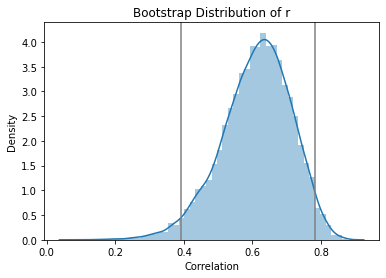

In [34]:
sns.distplot(boot_corrs3)
lb, ub = np.quantile(boot_corrs3, [0.025, 0.975])
plt.axvline(lb, color='grey')
plt.axvline(ub, color='grey')
plt.title('Bootstrap Distribution of r')
plt.ylabel('Density')
plt.xlabel('Correlation')
plt.show()

This looks left skewed.

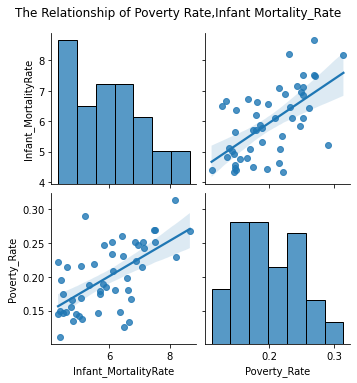

In [35]:
sns.pairplot(Rshp1,kind='reg')
plt.suptitle('The Relationship of Poverty Rate,Infant Mortality_Rate',y=1.05)
plt.show()

## Write 2–3 paragraphs about what you learn from these data. Discuss also limitations that you see in the data and analysis!

What i learnt from the data first is that it all about the relationship between poverty rates and and health outcomes in US states and territories which from the analysis shows that there is a positive correlation between poverty rate, Meningitis and infant mortality.I also learnt that data from various sources can have a common feature with which they can be linked and analyzed.Furthermore, i learnt the importance of keeping record of data analysis steps and operations on the data-renaming,joins/merge etc while working on datasets as diverse as these ones we used in this assignment.

The limitations i saw in the data is that the variables are not explanatory and they are too many and very disturbing to go through.Also,the number of states and territories in the US is more than 50. But i got 50 at the end after merging the datasets which implies that the datasets have varying number of states.
The limitations in the analysis is that we were unable to test for the significance of the correlation coefficient we computed.Also,there maybe other variables that could have contributed to the poverty rate which were not included in the dataset.